<a href="https://colab.research.google.com/github/zoe-elisa/IA/blob/main/AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 2**: *Processing Datasets in Python.*
---
##### **TEAM:**
---

*   Kelly Estefanía de la Rosa Gauna ; 2048165 - 002 ; N2
*   Sebastian Tamez Rodriguez ; 2071362 - 003 ; N1
*   Fatima Zoe Elisa Juarez Barrientos ; 2004844 - 003 ; N1
*   Melissa Rojas Resendiz ; 2132073 - 002 ; N2
*   Angel Raymundo Balderas Ledezma; 2132172 - 003 ; N1


#**INTRODUCTION**

This activity focuses on the preparation of a specific dataset with the aim of improving its quality and making it more suitable for predictive modeling. The objectives include identifying and correcting incomplete or unrealistic values to ensure that the dataset, particularly in the biomedical field, reflects accurate and consistent information that can support clinical decision-making and safeguard patient safety. Equally important is the transformation of variables through processes such as normalization, which allows different attributes to be expressed on comparable ranges. In addition, the use of graphical representations, such as histograms and boxplots, makes it possible to examine the distribution of variables, detect irregularities, and evaluate the impact of the transformations applied. That is why the importnace of developing a suitable programm for that analysis.

# **PART ONE: DATA LOADING AND EXPLORATION**

We start by importing the main libraries that we are going to use throughout the activity like pandas that helps us to load the dataset and manage it in the form of DataFrames. We also use numpy to perform numerical operations; matplotlib to create basic plots and seaborn to improve the design of the graphics

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# no le andes moviendo

Once the libraries are imported, we load the dataset given in the activity and  *use pd.read_csv()* to read the infomation.

In [60]:
data = pd.read_csv("diabetes.csv")

With *data.head()*, we take a quick look at the first 10 rows to get a sense of its structure.

In [61]:
data.head(10) # me gusta mas asi pero que segun buenas practicas lo de abajo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [62]:
#print(data.head(10))

 Then, we check how many values are equal to zero in each column of the DataFrame data using ((data == 0).sum()) because in some variables zero value is not realistic and should be treated as missing data. We do not use *data.isnull()* here, because it only detects actual null or NaN values, and would not identify zeros, which in this dataset represent invalid or missing measurements rather than true nulls.

In [63]:
print((data == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Finally, we generate descriptive statistics using the *.describe() method*, which provides a summary of each numerical column including mean, standard deviation, minimum, maximum and quartiles.

In [64]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **PART TWO: DATA CLEANING AND NORMALIZATION**

In this step, we need to replace the zero values in the dataset with NaN so that Pandas can correctly recognize them as missing data. To do this, we use the command *df_missing = df.replace(0, np.nan)*. The output shown in the image is an exaple of how all zeros in the DataFrame are replaced by NaN. This image was taken from the official Pandas documentation.

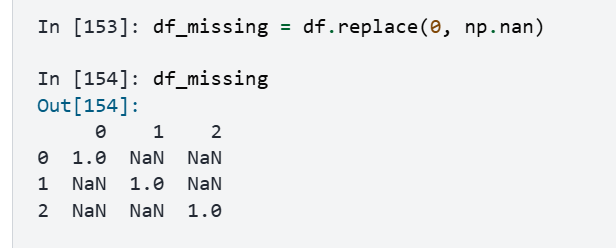

Here you can see how we use the command in each variable.

In [65]:
data["Glucose"] = data["Glucose"].replace(0, np.nan)
data["BloodPressure"] = data["BloodPressure"].replace(0, np.nan)
data["SkinThickness"] = data["SkinThickness"].replace(0, np.nan)
data["Insulin"] = data["Insulin"].replace(0, np.nan)
data["BMI"] = data["BMI"].replace(0, np.nan)

In [66]:
#data.head(10) # esto lo podemos quitar solo es para yo checar que pede

In [67]:
data["Glucose"] = data["Glucose"].fillna(data["Glucose"].mean())
data["BloodPressure"] = data["BloodPressure"].fillna(data["BloodPressure"].mean())
data["SkinThickness"] = data["SkinThickness"].fillna(data["SkinThickness"].mean())
data["Insulin"] = data["Insulin"].fillna(data["Insulin"].mean())
data["BMI"] = data["BMI"].fillna(data["BMI"].mean())

In this step, we calculate the minimum and maximum values for each column in the dataset using functions *np.min* and *np.max* functions. These values allow us to apply the Min-Max normalization formula, which rescales all the numerical data into a range between 0 and 1.

In [68]:
# Calculation of min and max by column
min_vals = np.min(data, axis=0)
max_vals = np.max(data, axis=0)

# Min-Max normalization
normalized_data = (data - min_vals) / (max_vals - min_vals)

print("Original data:")
print(data)
print("\nNormalized data:")
print(normalized_data)

Original data:
     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0             

# **PART TREE: DATA VISUALIZATION**

#### Histogram of glucose levels before and after normalization.
For this part of our code we will be using the library Matplotlib and most of the Matplotlib utilities lies under the pyplot submodule, and we are importing them under the plt alias.
We use the funtion subplot so we can draw multiple plots in one figure and also other functions to personalize size and color.

Text(0.5, 1.0, 'Glucose levels after \n normalization')

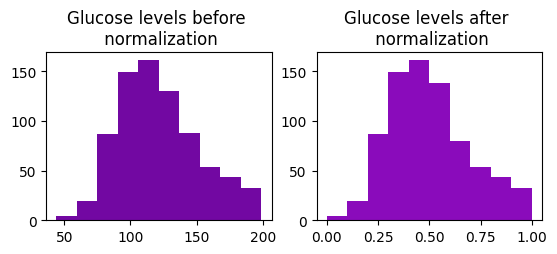

In [69]:
plt.subplot(2, 2, 1)
plt.hist(data['Glucose'], color='#7208a2')
plt.title("Glucose levels before \n normalization")

plt.subplot(2, 2, 2)
plt.hist(normalized_data['Glucose'], color='#8a0bbb')
plt.title("Glucose levels after \n normalization")

#### Boxplot to identify outliers in blood pressure
For an esair(help) personalitation now we are using the library seabor as sns because if we use matploylib it requieres more steps to change the boxplot colors.

<Axes: ylabel='BloodPressure'>

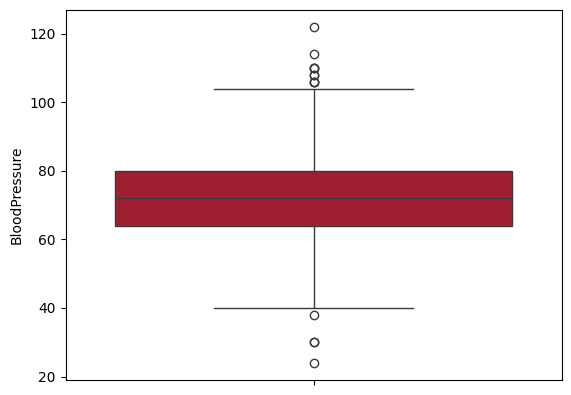

In [70]:
sns.boxplot(data['BloodPressure'], color='#b50b24')

#### Scatter plot between Glucose and BMI to analyze correlation
We also use sns here because it automatically adds the labels and the desing for the dots it's better.

Text(0.5, 1.0, 'Scatter plot')

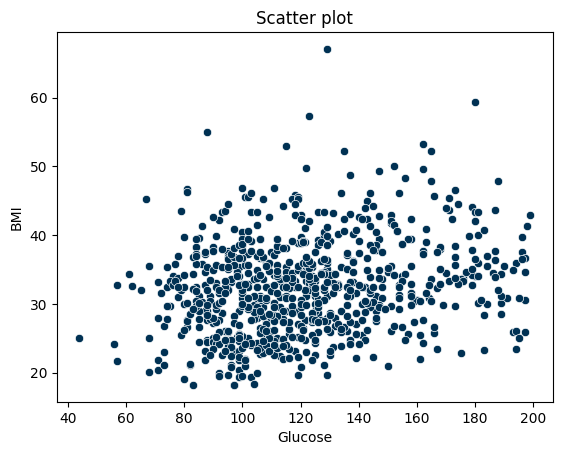

In [71]:
sns.scatterplot(x=data["Glucose"], y=data['BMI'], color='#003153')
plt.title("Scatter plot")

#### Bar chart showing the number of patients with and without diabetes (Outcome)
With the bar function we create the layout of the bar, sthe categories and their values represented by the first and second argument as arrays.
We first have to count the numbre of negative outcomes (0) and establish a variable for that, and another for the positive outcomes (1); after this we then create our labels as the firts array and the values as the second.

Text(0.5, 1.0, 'Outcome')

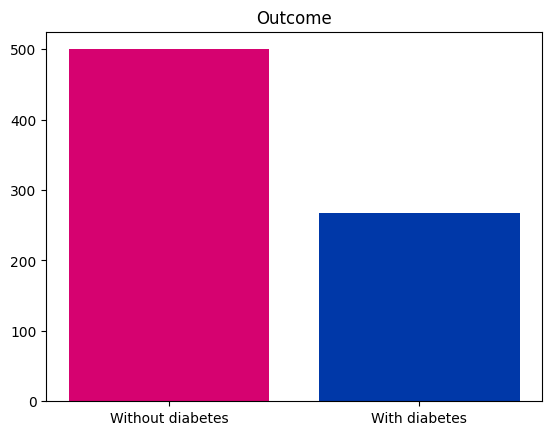

In [72]:
neg = (data['Outcome'] == 0).sum()
pos= (data['Outcome'] == 1).sum()

plt.bar(['Without diabetes' , 'With diabetes'], [neg,pos], color=["#D60270", "#0038A8"])
plt.title('Outcome')

***CUESTIONARY.***

**1. What impact do missing values have on data analysis?**

Missing values affect three key things: bias, statistical power and external validity. If data are missing completely at random (MCAR), missing cases especially reduce sample size and increase variance. But in biomedicine it is more common to be missing conditionally random (MAR) or non-random (MNAR). MAR and especially MNAR introduce systematic bias if we simply remove rows. Algorithms that assume full matrices may fail or learn spurious patterns; for example, a network may confound that a missing test is correlated with severity if the missingness is not random. In longitudinal trials, absenteeism due to loss to follow-up distorts trajectories and may inflate or attenuate effects. Therefore, it is convenient to: characterize the mechanism of absence; compare descriptions between complete vs. incomplete cases; use multiple imputation or maximum likelihood methods; include “missing” indicators when it makes clinical sense; and report sensitivity analyses.

**2. How can we detect and handle outliers in biomedical datasets?**

To detect outliers, researchers typically begin with exploratory data analysis (EDA). Visualization tools such as boxplots, scatter plots, or histograms help identify values that fall far from the majority of the data. For more formal methods, statistical techniques are applied. The Z-score method detects values that are several standard deviations away from the mean, while the interquartile range (IQR) rule flags observations lying below Q1 − 1.5×IQR or above Q3 + 1.5×IQR. For datasets with non-normal distributions, robust methods such as the median absolute deviation (MAD) are preferred. In high-dimensional biomedical data, multivariate techniques like Mahalanobis distance, principal component analysis (PCA), or clustering-based anomaly detection can be applied to detect unusual patterns that may not stand out in a single variable. Handling outliers depends on their nature and the research context. If the outlier is caused by measurement or data entry errors, it can be corrected or removed. If it reflects a rare but clinically significant condition, it should not be discarded, as it could provide valuable insights.

**3. What are some common causes of missing or incorrect data in biomedical studies?**

They arise from human failures (typing, transcription, code mapping), devices (poorly calibrated sensors, detection limits that censor low measurements), logistics (degraded samples, misplacement, time misalignment), and patient behavior (non-adherence, dropout in cohorts). In EHR, heterogeneity of systems, formats and units generates errors (mg/dL vs mmol/L; “<5” as text), as well as not recorded that does not distinguish “not measured” from “did not apply”. In trials, protocol changes, consent problems, or redaction/anonymization can erase fields. There are also systematic causes that induce MNAR: more severe patients may skip visits or exams, or certain tests are only ordered in the presence of clinical suspicion.

**4. How does normalizing data improve the performance of Machine Learning models?**

Normalization aligns scales and reduces the numerical condition of the problem, facilitating optimization and making distances meaningful. Distance-based models (k-NN, k-means), SVM with kernels and neural networks are especially sensitive; without scaling, one variable in large magnitudes can dominate over another clinically relevant but small-scale variable. In biomedicine, in addition to the classical z-score (mean-standard deviation), robust scalers (median-IQR) are appropriate when there are heavy tails/outliers. For omic counts, specific normalizations are used and, in imaging/physiology data, per-channel or per-subject normalizations. Transformations such as log/Box-Cox reduce asymmetry and make the assumptions of many models (residuals ~ normal) more reasonable.

**5. Why is visualizing data an important step before applying Machine Learning models?**

Visualization is an essential step because it allows researchers to read the dataset before modeling, detect hidden patterns, and understand the structure of the data intuitively. In biomedicine, where data quality often varies and clinical interpretation is critical, a simple graph can reveal serious problems that do not appear in numerical summaries. For example, a blood glucose histogram might show a bimodal distribution that differentiates patients with and without diabetes, whereas a table of means would not make this so clear. Through graphs it is possible to identify outliers, systematic biases, nonlinear relationships and redundant variables. It is also possible to observe class imbalances, very frequent in medical datasets, which directly influences the choice of algorithms and evaluation metrics. In addition, visualization helps to verify model assumptions. If the variables are not approximately normally distributed, it may be necessary to apply transformations. If there are strong correlations, it may be desirable to reduce dimensionality or eliminate redundant variables to avoid overfitting.

**6. Why is preprocessing critical when working with medical datasets?**

Preprocessing is essential in medical datasets because they often contain missing values, recording errors, heterogeneous formats, and variables measured on very different scales. Without proper cleaning and standardization, analysis or Machine Learning models can produce biased or unreliable results. Techniques such as missing value imputation, variable normalization, and outlier detection help reduce noise, improve data quality, and enhance the interpretation of results. In this way, preprocessing ensures that the patterns identified reflect clinical reality rather than recording errors or formatting inconsistencies.

**7. What ethical concerns should be considered when handling patient data?**

Handling patient data carries a major ethical responsibility, as it involves sensitive and confidential information. It is crucial to guarantee patient privacy and confidentiality through anonymization or pseudonymization, as well as to obtain informed consent for the use of their data in research. Security measures must also be implemented to protect information from unauthorized access, and data should not be used for purposes beyond those approved. Additionally, it is important to prevent biases that may lead to discrimination against specific population groups and to maintain transparency in how the data is processed and analyzed.

